# 🚗CAR_PRICE_PREDICTION🚗

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWKcGGJHMv_aDZn-Uikz-R4ihg5bpTNscMSm-fVIYZAUA4sBonj1FjxOZtyCR3ZiW6_q0&usqp=CAU" width="400" height="200">

## PROBLEM_STATEMENT

__A INDIAN automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.__

__They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:__

__Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.__

## BUSINESS_GOAL

__We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.__

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

## IMPORTING DATASET

In [2]:
data=pd.read_csv("CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## DATA INSIGHT

In [3]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## DESCRIBING DATA WITH OBJECT DATATYPE

In [7]:
data.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [8]:
data.shape

(205, 26)

## CHEKCING NULL VALUES

In [9]:
data.isnull().sum(
)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

__OUR DATASET NOT CONTAIN ANY NULL_VALUES__

In [10]:
data.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


__SPLITING THE C0MPANY_NAME AND ADDINGV AN ADDITIONAL COLUMN {CARANME} AND DROPING THE PAST COLUMN__

In [11]:
data["Company_name"]=data['CarName'].apply(lambda x : x.split(' ')[0])
data.drop(['CarName'],axis=1,inplace=True)

In [12]:
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [13]:
data["Company_name"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

__MANYY OF THE COLUMNS HAVE DUPLIACTE NAME SO WE HAVE TO REPALCE THAT WITH SAME NAME__

In [14]:
data[data["Company_name"]=="maxda"]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name
50,51,1,gas,std,two,hatchback,fwd,front,93.1,159.1,...,2bbl,3.03,3.15,9.0,68,5000,30,31,5195.0,maxda
51,52,1,gas,std,two,hatchback,fwd,front,93.1,159.1,...,2bbl,3.03,3.15,9.0,68,5000,31,38,6095.0,maxda


## MAKING FNX. TO DO SO

In [15]:
data["Company_name"]=data["Company_name"].str.lower()
def change(a,b):
    data["Company_name"].replace(a,b,inplace=True)
    
change("maxda","mazda")

In [16]:
change('porcshce','porsche')
change('toyouta','toyota')
change('vokswagen','volkswagen')
change('vw','volkswagen')

In [17]:
data["Company_name"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### CHECKING FOR DUPLICATE VALUES

In [18]:
data[data.duplicated()]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name


In [19]:
data.loc[:,data.dtypes=="object"].head(10)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company_name
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
5,gas,std,two,sedan,fwd,front,ohc,five,mpfi,audi
6,gas,std,four,sedan,fwd,front,ohc,five,mpfi,audi
7,gas,std,four,wagon,fwd,front,ohc,five,mpfi,audi
8,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi,audi
9,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi,audi


# VISUALIZATING THE DATA

### DENSITY PLOT AND BOX PLOT

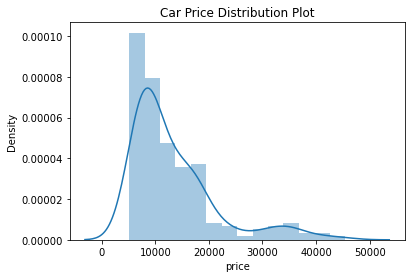

In [20]:
sns.distplot(data.price)
plt.title("Car Price Distribution Plot")
plt.show()

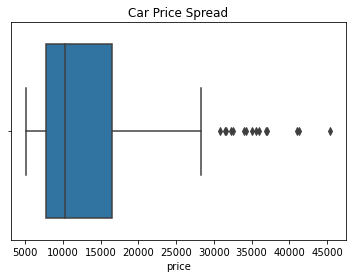

In [21]:
sns.boxplot(data.price)
plt.title("Car Price Spread")
plt.show()

__Inference :__

1.The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).

2.There is a significant difference between the mean and the median of the price distribution.

3.The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

In [22]:
data.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [23]:
data.head(1)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero


### OTHER PLOT REGARDING DATA

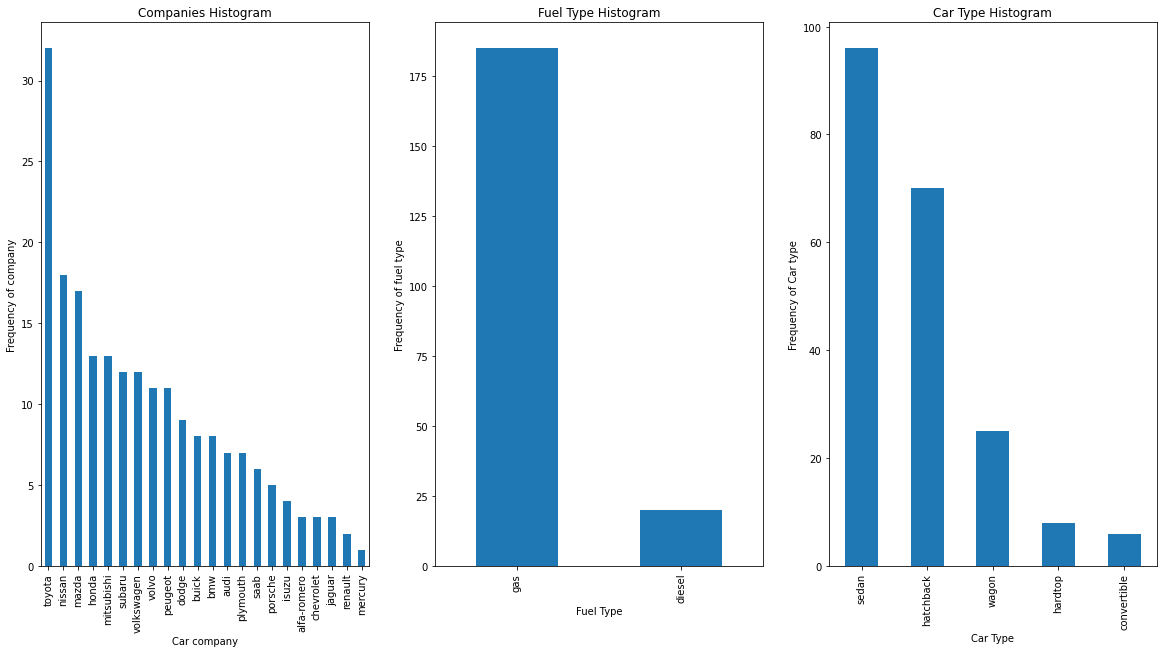

In [24]:
plt.figure(figsize=(20,10))
    
plt.subplot(1,3,1)
plt1 = data.Company_name.value_counts().plot.bar()
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = data.fueltype.value_counts().plot.bar()
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = data.carbody.value_counts().plot.bar()
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

__Inference :__

Toyota seemed to be favored car company.

Number of gas fueled cars are more than diesel.

sedan is the top car type prefered.

In [25]:
data.Company_name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### COMPANY NAME WITH PRICES

In [ ]:
import plotly.express as px
px.line(data, y='price', color='Company_name', title="PRICE W.R.T CARS", template ="plotly_dark")

## FUNCTION OF PLOTING 

### HIST PLOT & BOX PLOT

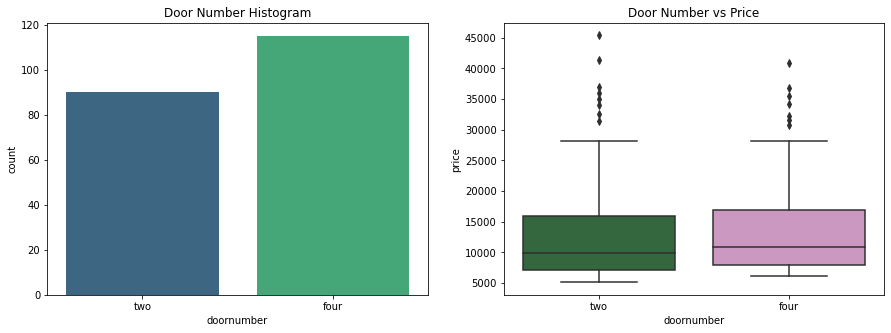

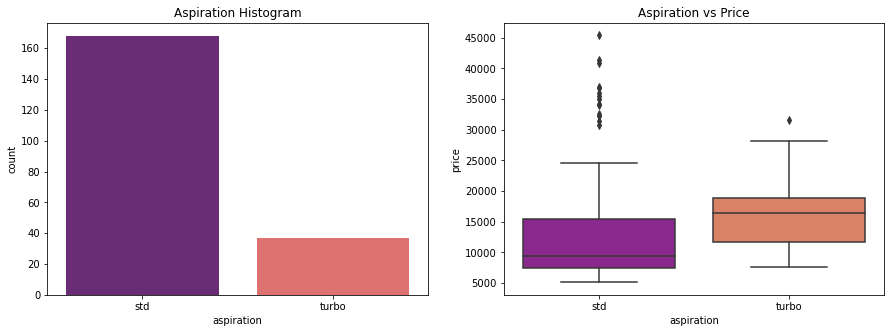

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(data.doornumber, palette=("viridis"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=data.doornumber, y=data.price, palette=("cubehelix"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(data.aspiration, palette=("magma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=data.aspiration, y=data.price, palette=("plasma"))

plt.show()

__Inference :__

1.doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.

2.It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

In [28]:



def ploting_plot(x,fig):
    plt.figure(figsize=(20,20))
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(data[x],palette=("viridis"))
    
    plt.subplot(4,2,fig+1)
    sns.boxplot(x=data[x],y=data.price,palette="viridis")
    plt.title(x+' vs Price')
    plt.show()

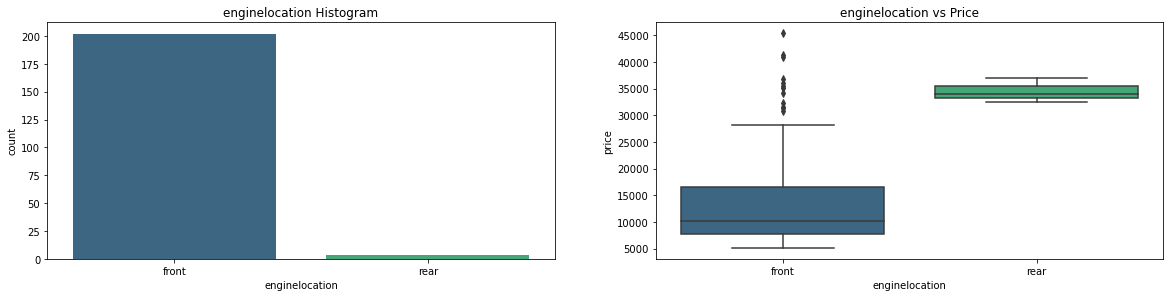

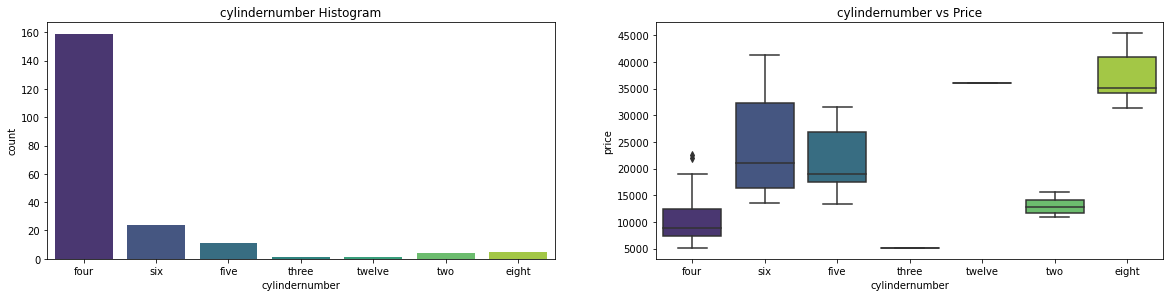

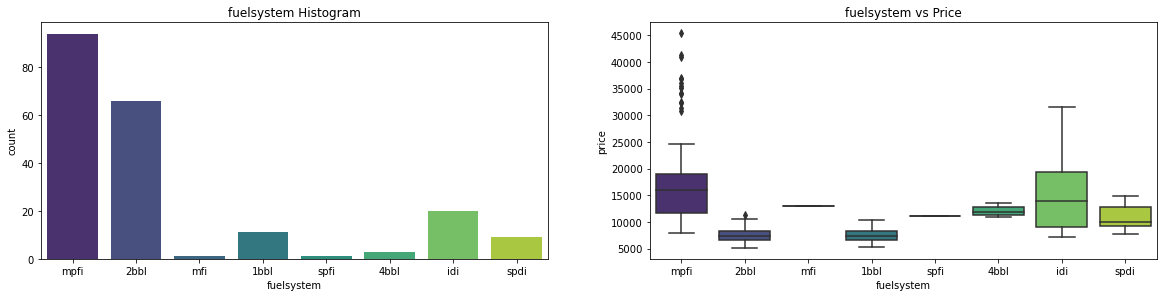

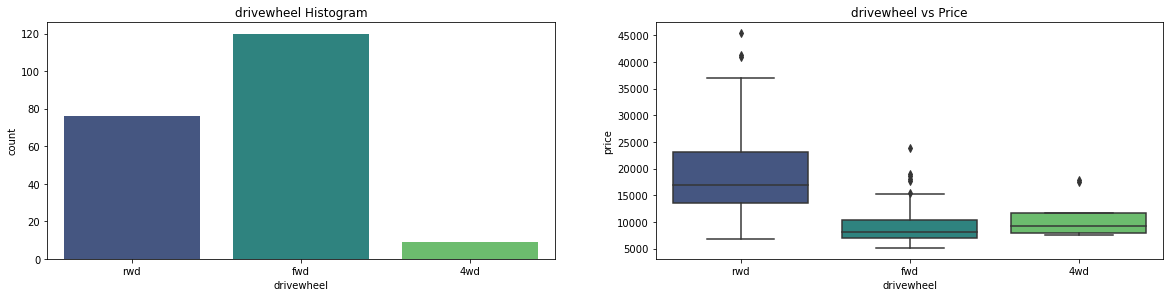

In [29]:
ploting_plot('enginelocation',1)
ploting_plot('cylindernumber',3)
ploting_plot('fuelsystem',5)
ploting_plot('drivewheel',7)

__Inference :__

1.Very few datapoints for enginelocation categories to make an inference.

2.Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.

3.mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for

4.other categories to derive any meaningful inference

5.A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

### SCATTER PLOT 

In [30]:
def sct_plot(y,fig):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,fig)
    plt.scatter(data[y],data['price'])
    plt.title(y +' vs Price')
    plt.ylabel('Price')
    plt.xlabel(y)
    plt.show()

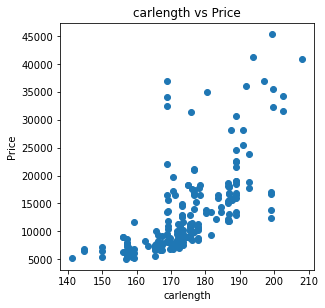

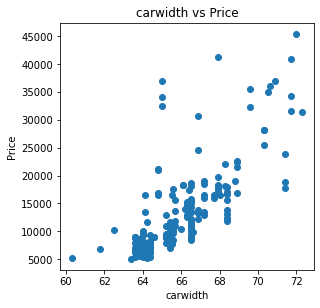

In [31]:
sct_plot('carlength',1)
sct_plot('carwidth', 2)

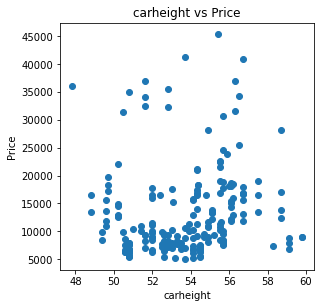

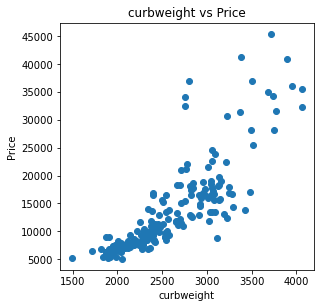

In [32]:
sct_plot('carheight', 3)
sct_plot('curbweight', 4)

__Inference :__

1.carwidth, carlength and curbweight seems to have a poitive correlation with price.

2.carheight doesn't show any significant trend with price.

### DEFINING CORRELATION

In [33]:
data.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

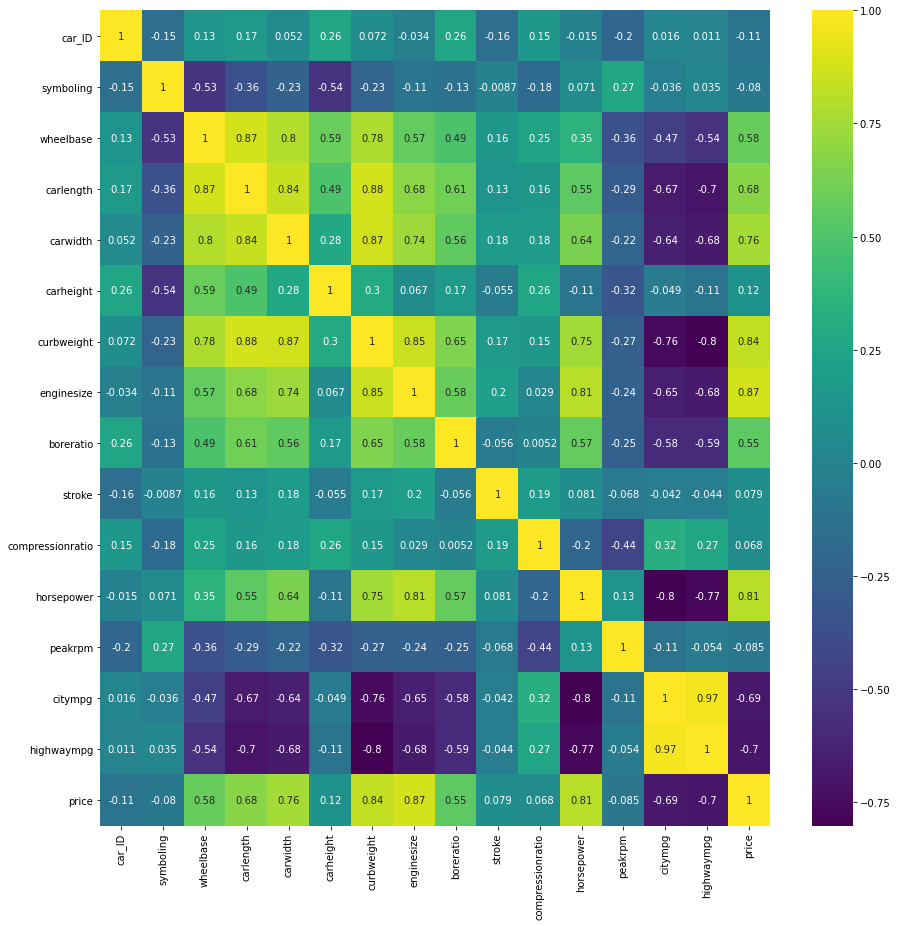

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

# MODEL BUILDING

## LABEL ENCODING 
__FOR REPALCING OBJECT DATATYPE TO INT DATATYPE__

In [35]:
labelencoder= LabelEncoder()

In [36]:
data['fueltype']=labelencoder.fit_transform(data["fueltype"])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['enginelocation'])

In [37]:
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name
0,1,3,1,0,two,0,2,0,88.6,168.8,...,0,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,1,0,two,0,2,0,88.6,168.8,...,0,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,1,0,two,2,2,0,94.5,171.2,...,0,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,1,0,four,3,1,0,99.8,176.6,...,0,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,1,0,four,3,0,0,99.4,176.6,...,0,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [38]:
data.dtypes

car_ID                int64
symboling             int64
fueltype              int32
aspiration            int32
doornumber           object
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
Company_name         object
dtype: object

### ASSIGNING TRAIN AND TEST DATA

In [39]:
X = data[['wheelbase', 'fueltype','carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carbody']]

In [40]:
Y=data["price"]

In [41]:
X

,wheelbase,fueltype,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,carbody
0,88.6,1,168.8,64.1,2548,130,3.47,111,0
1,88.6,1,168.8,64.1,2548,130,3.47,111,0
2,94.5,1,171.2,65.5,2823,152,2.68,154,2
3,99.8,1,176.6,66.2,2337,109,3.19,102,3
4,99.4,1,176.6,66.4,2824,136,3.19,115,3
...,...,...,...,...,...,...,...,...,...
200,109.1,1,188.8,68.9,2952,141,3.78,114,3
201,109.1,1,188.8,68.8,3049,141,3.78,160,3
202,109.1,1,188.8,68.9,3012,173,3.58,134,3
203,109.1,0,188.8,68.9,3217,145,3.01,106,3


In [42]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

### FOR ACCURACY USING MIN MAX SCALER

In [43]:
scalea= MinMaxScaler()

In [44]:
X=scalea.fit_transform(X)

In [45]:
X

array([[0.05830904, 1.        , 0.41343284, ..., 0.66428571, 0.2625    ,
        0.        ],
       [0.05830904, 1.        , 0.41343284, ..., 0.66428571, 0.2625    ,
        0.        ],
       [0.2303207 , 1.        , 0.44925373, ..., 0.1       , 0.44166667,
        0.5       ],
       ...,
       [0.65597668, 1.        , 0.7119403 , ..., 0.74285714, 0.35833333,
        0.75      ],
       [0.65597668, 0.        , 0.7119403 , ..., 0.33571429, 0.24166667,
        0.75      ],
       [0.65597668, 1.        , 0.7119403 , ..., 0.88571429, 0.275     ,
        0.75      ]])

## TRANING MODEL USING LINEAR REGRESSION

# Linear Regression
**Our data contains only one independent variable ($X$)</strong> which represents the <em>date</em> and the <strong>dependent variable ($Y$)</strong> we are trying to predict is the <em>Stock Price</em>. To fit a line to the data points, which then represents an estimated relationship between $X$ and $Y$, we can use a Simple Linear Regression.

The best fit line can be described with
$$
Y = \beta_0 + \beta_1 X
$$

where

* $Y$ is the predicted value of the dependent variable
* $\beta_0$ is the y-intercept
* $\beta_1$ is the slope
* $X$ is the value of the independent variable

The goal is to find such coefficients $\beta_0$ and $\beta_1$ that the Sum of Squared Errors, which represents the difference between each point in the dataset with it’s corresponding predicted value outputted by the model, is minimal.

In [46]:
model=LinearRegression()

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [48]:
model.fit(X_train, Y_train)

LinearRegression()

In [49]:
model.predict(X_test)

array([6.73373942e+03, 9.40302467e+03, 2.14816363e+04, 9.80242405e+03,
       1.50652630e+04, 2.14998489e+04, 1.29534759e+04, 5.70013743e+03,
       1.05634129e+04, 7.46166739e+03, 1.04693507e+04, 1.44002061e+04,
       7.20804918e+03, 6.47805029e+03, 9.45071028e+03, 1.34533941e+04,
       1.00313393e+04, 1.18449028e+04, 6.07782740e+03, 5.74460198e+03,
       1.08637019e+04, 1.09989696e+04, 4.68789536e+03, 5.61255579e+03,
       1.60950216e+04, 3.16248806e+04, 6.68632779e+03, 8.27663889e+03,
       8.83383665e+03, 8.13586629e+03, 5.49774423e+03, 9.16606562e+03,
       2.02816855e+04, 2.02499109e+04, 1.60929911e+04, 1.41603370e+04,
       5.82586479e+03, 6.59421273e+03, 1.05880032e+04, 9.64427318e+03,
       5.32713423e+03, 4.70322796e+03, 3.75292970e+04, 2.31930231e+04,
       6.65860966e+03, 2.58329401e+04, 5.79519958e+03, 6.95623353e+03,
       1.69642047e+04, 1.69540806e+04, 4.06073182e+00, 1.19805199e+04,
       6.43205247e+03, 1.50410835e+04, 2.49548524e+04, 1.41706336e+04,
      

### ACCURACY SCORE WITH LESS NO. OF FEATURE

In [50]:
r2_score(y_test, model.predict(X_test))

NameError: name 'y_test' is not defined

## TRANING MODEL WITH MORE NO. OF FEATURE

In [ ]:
X_train.shape[0]

In [ ]:
data.head()

In [ ]:
X1 = data.drop(columns=['CarName', 'price', 'doornumber', 'enginetype', 'cylindernumber'])

In [ ]:
X1

In [ ]:
scalea= MinMaxScaler()

In [ ]:
X1=scalea.fit_transform(X1)

In [ ]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

In [ ]:
model.fit(X1_train, y_train)

In [ ]:
y_pred=model.predict(X1_test)
y_pred

## Accuracy Evaluation Metrics
To see how accurate our model is, we can calculate the **Coefficient of determination**, which describes the ratio between the total error and the error, that is explained by our model. It's value is between 0 and 1, with 1 meaning 100% of the error is acoounted for by the model.

**Coefficient of determination**$$
R^2 = 1 - \frac{RSS}{TSS}
$$

with

**Residual Sum of Squares (RSS)**$$
RSS = \sum_{i = 1}^{N} \epsilon_i^2 = \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Total Sum of Squares (TSS)**$$
TSS = \sum_{i = 1}^{N} (y_i - \bar{y}_i)^2
$$

### ACCURACY SCORE INCREASES TO 85%

In [ ]:
r2_score(y_test, model.predict(X1_test))

### PLOTING ACTUAL DATA AND PREDICTED DATA

In [ ]:
plt.figure(figsize=(10,7), dpi=100)
sns.scatterplot(x=range(len(y_test)), y=y_test, color='blue', label='Test Value')
sns.scatterplot(x=range(len(y_pred)), y=y_pred, color='red', label='Predicted Value')


<img src="https://i.imgur.com/9SJHwJr.png" width="400" height="200">

# THE END!